In [66]:

!pip3 install request
!pip3 install lxml


ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/53/c0/bac6130e2edfe32211e6c99280dc0e1b1eabf0591948c1aa8a8e7c7172c6/lxml-5.1.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.6 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip


In [67]:

import requests
from lxml import html


sites = ["https://pt.wikipedia.org/wiki/Napoleão_Bonaparte", 'https://www.homehost.com.br/blog/criar-sites/tabela-html/', 'https://g1.globo.com/economia/noticia/2023/11/22/desemprego-cai-em-3-estados-no-3o-trimestre-de-2023-diz-ibge.ghtml']
xpath =['//*[@id="mw-content-text"]/div[1]/p[1]', '/html/body/div[2]/section/div/div/div/div[4]/div/table[5]', '//*[@id="fl-layout-primary-container"]']


def obter_conteudo_com_xpath(url, xpath):
    try:
        # Obtém o conteúdo HTML da página usando a função anterior
        conteudo_html = obter_html(url)
        
        if conteudo_html:
            # Analisa o HTML usando a biblioteca lxml
            arvore_html = html.fromstring(conteudo_html)
            
            # Extrai o conteúdo usando o XPath fornecido
            elementos = arvore_html.xpath(xpath)
            
            # Obtém o texto de cada elemento e os une em uma string
            resultado_xpath = ' '.join([elemento.text_content().strip() for elemento in elementos])
            
            # Retorna o resultado como texto concatenado
            return resultado_xpath
        else:
            return None
    except Exception as e:
        print(f"Erro durante a extração do XPath: {str(e)}")
        return None

# URL e XPath de exemplo


# Obtém o conteúdo usando o XPath
conteudos = []

for i in range(len(sites)):
    conteudo_xpath = obter_conteudo_com_xpath(sites[i], xpath[i])
    conteudos.append(conteudo_xpath)

for j in conteudos:
    print("")
    print("-------")
    print(j)



Erro durante a extração do XPath: name 'obter_html' is not defined
Erro durante a extração do XPath: name 'obter_html' is not defined
Erro durante a extração do XPath: name 'obter_html' is not defined

-------
None

-------
None

-------
None


In [3]:
#pip

!pip3 install numpy pandas seaborn matplotlib scikit-learn



  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/6d/66/5ea5b8ef7cb3f72ecd6c905abc2331f999bf7e9de247f9db8cc9642f0eda/numpy-1.26.3-cp312-cp312-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 880.5 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/e1/1e/d708cda584a2d70e6d3c930d102d07ee3d65bec3b2861f416b086cc518a8/pandas-2.2.0-cp312-cp312-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e4/1b/864d28d5a72d586ac137f4ca54d5afc8b869720e30d508dbd9adcce4d231/matplotlib-3.8.2-cp312-cp312-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for scikit-learn from h

In [48]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [54]:
#dataset import
df = pd.read_csv('base.csv', sep=';')


In [ ]:
# ---------------------- TRATANDO DADOS ----------------------

In [55]:


#colunas vazias
df = df.drop('Valor de Compra', axis=1)
df = df.drop('Complemento', axis=1)

#transformando em float
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.').astype(float)


#transformando todas as colunas em numerica e fazendo categorias
label_encoder = LabelEncoder()

colunas_com_strings = df.select_dtypes(include=['object']).columns.difference(['Valor de Venda'])

# Itera sobre as colunas com strings
for coluna in colunas_com_strings:
    df[coluna] = label_encoder.fit_transform(df[coluna])



# Exibe o DataFrame após a conversão
print(df.dtypes)
print('-'*60)
print(df.iloc[0])

Regiao - Sigla         int64
Estado - Sigla         int64
Municipio              int64
Revenda                int64
CNPJ da Revenda        int64
Nome da Rua            int64
Numero Rua             int64
Bairro                 int64
Cep                    int64
Produto                int64
Data da Coleta         int64
Valor de Venda       float64
Unidade de Medida      int64
Bandeira               int64
dtype: object
------------------------------------------------------------
Regiao - Sigla          4.00
Estado - Sigla         25.00
Municipio             408.00
Revenda              3684.00
CNPJ da Revenda         3.00
Nome da Rua          4844.00
Numero Rua           1751.00
Bairro               1868.00
Cep                  1889.00
Produto                 3.00
Data da Coleta          7.00
Valor de Venda          4.87
Unidade de Medida       0.00
Bandeira                5.00
Name: 0, dtype: float64


In [56]:
#dataset exibição
display(df)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,4,25,408,3684,3,4844,1751,1868,1889,3,7,4.87,0,5
1,4,25,408,3684,3,4844,1751,1868,1889,1,7,4.88,0,5
2,4,25,408,3684,3,4844,1751,1868,1889,2,7,3.27,0,5
3,1,0,129,3065,1705,211,468,4,4905,3,7,6.95,0,45
4,1,0,129,3065,1705,211,468,4,4905,1,7,6.85,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472419,1,3,364,5869,4938,3524,1723,3649,4753,0,119,6.44,0,16
472420,1,3,364,5869,4938,3524,1723,3649,4753,1,119,6.49,0,16
472421,2,16,301,4910,8385,889,1979,2741,4448,3,114,5.20,0,5
472422,2,16,301,4910,8385,889,1979,2741,4448,4,114,5.20,0,5


   Regiao - Sigla  Estado - Sigla  Municipio  Revenda  CNPJ da Revenda  \
0               4              25        408     3684                3   
1               4              25        408     3684                3   
2               4              25        408     3684                3   
3               1               0        129     3065             1705   
4               1               0        129     3065             1705   

   Nome da Rua  Numero Rua  Bairro   Cep  Produto  Data da Coleta  \
0         4844        1751    1868  1889        3               7   
1         4844        1751    1868  1889        1               7   
2         4844        1751    1868  1889        2               7   
3          211         468       4  4905        3               7   
4          211         468       4  4905        1               7   

   Valor de Venda  Unidade de Medida  Bandeira  
0            4.87                  0         5  
1            4.88                  0      

In [60]:
# --------------- MODELO MACHINE LEARNING --------------- 


def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR2:{r2:.2%}\nRSME:{RSME:.2%}'

In [61]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf, 
           'LinearRegression': modelo_lr, 
           'ExtraTres': modelo_et,
          }

#definindo x e y


y = df['Valor de Venda']
X = df.drop('Valor de Venda', axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treino
    modelo.fit(X_train, y_train)
    #teste
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R2:95.21%
RSME:20.56%
Modelo LinearRegression:
R2:6.01%
RSME:91.13%
Modelo ExtraTres:
R2:92.39%
RSME:25.93%


In [ ]:
for nome_modelo, modelo in modelos.items():
    #teste
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

#RandomForest -- modelo escolhido

,0
Regiao - Sigla,0.013825
Estado - Sigla,0.030661
Municipio,0.018691
Revenda,0.010956
CNPJ da Revenda,0.010726
Nome da Rua,0.009200
Numero Rua,0.008731
Bairro,0.009156
Cep,0.071175
Produto,0.695090


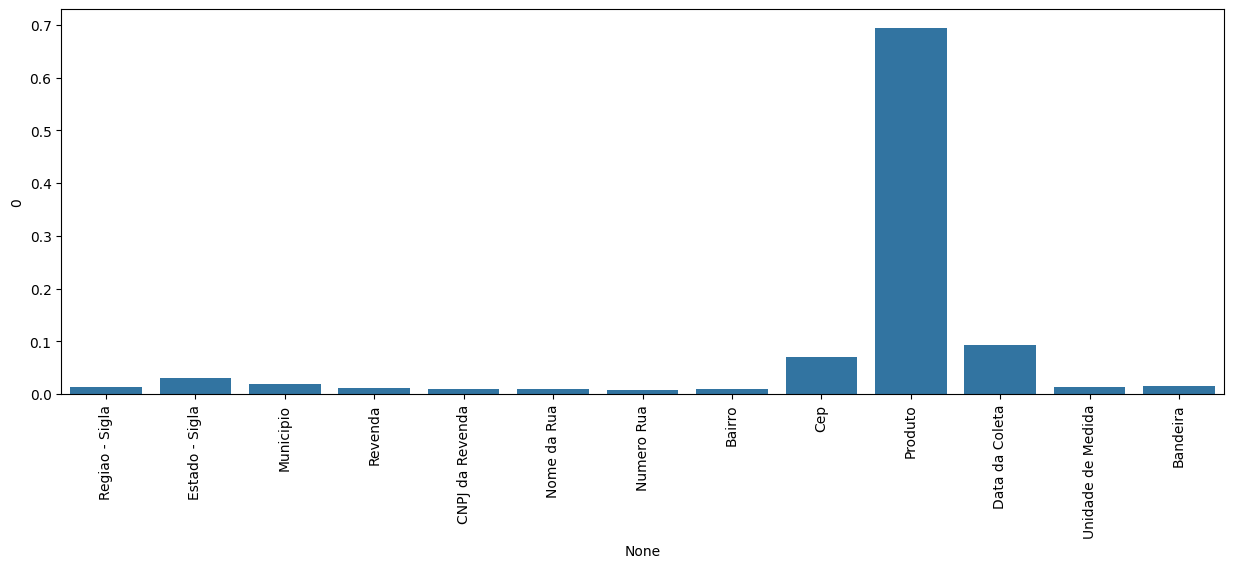

In [64]:
#importancia de cada coluna

importancia_features = pd.DataFrame(modelo_rf.feature_importances_,X_train.columns)
display(importancia_features)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index,y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)


#ax.set_xlim(limites(coluna))
#def limites(coluna):
#    q1 = coluna.quantline(0.25)    
#    q3 = coluna.quantline(0.75)  
#    amplitude = q3 - q1

In [65]:
print(previsao)

[6.2771 5.5376 5.8487 ... 5.9349 3.8007 4.7772]
